In [1]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# IMPORT FILES

In [2]:
### import and read csv file

path = '../Output/immigrants_by_country_monthly.csv'
imm_df = pd.read_csv(path)
imm_df = imm_df.rename(columns={'total':'Immigration_flow'})

imm_df.head(5)

,index,country,year,month_str,month_int,quarter,immigration_flow
0,0,Afghanistan,2015,Feb,2,Q1,125
1,1,Albania,2015,Feb,2,Q1,25
2,2,Algeria,2015,Feb,2,Q1,125
3,3,Antigua and Barbuda,2015,Feb,2,Q1,5
4,4,Argentina,2015,Feb,2,Q1,15


In [3]:
### import and read csv file

path = '../Output/countries_immigration.csv'
countries_df = pd.read_csv(path)


countries_df.head(5)

,country,iso3Code,iso2Code,region,continent,sub-region,capitalCity,longitude,latitude,OCDE
0,Aruba,ABW,AW,Latin America & Caribbean,Latin America & Caribbean,Latin America & Caribbean,Oranjestad,-70.0167,12.51670,0
1,Afghanistan,AFG,AF,"Middle East, North Africa, Afghanistan & Pakistan",Asia,Southern Asia,Kabul,69.1761,34.52280,0
2,Angola,AGO,AO,Sub-Saharan Africa,Africa,Central Africa,Luanda,13.2420,-8.81155,0
3,Albania,ALB,AL,Europe & Central Asia,Europe,Southern Europe,Tirane,19.8172,41.33170,0
4,Andorra,AND,AD,Europe & Central Asia,Europe,Southern Europe,Andorra la Vella,1.5218,42.50750,0


In [4]:
### import and read csv file

path = '../Output/macro_economic_immigration.csv'
macro_data_df = pd.read_csv(path)

# #drop Nan values
# macro_data_df = macro_data_df['value'].dropna(how="all")

macro_data_df.head(5)

,Unnamed: 0,indicator,country,iso3Code,year,value
0,0,Access to clean fuels and technologies for coo...,Africa Eastern and Southern,AFE,2016,18.558234
1,1,Access to electricity (% of population),Africa Eastern and Southern,AFE,2016,38.859598
2,2,Agricultural land (% of land area),Africa Eastern and Southern,AFE,2016,46.161669
3,3,Arable land (% of land area),Africa Eastern and Southern,AFE,2016,8.102250
4,4,Arable land (hectares per person),Africa Eastern and Southern,AFE,2016,0.192867


In [5]:
### import and read csv file

path = '../Output/corruption_perception_index.csv'
cpi_df = pd.read_csv(path)


# cpi_df = cpi_df[['country', 'iso3Code', 'CPI score 2023' ]]

cpi_df.head(5)

,country,iso3Code,CPI_score_2023
0,Denmark,DNK,90
1,Finland,FIN,87
2,New Zealand,NZL,85
3,Norway,NOR,84
4,Singapore,SGP,83


In [6]:
### import and read csv file

path = '../Output/Global_Peace_Index.csv'
gpi_df = pd.read_csv(path)

gpi_df.head(5)


,country,Global_Peace_Index_2023
0,Afghanistan,3.294
1,Albania,1.809
2,Algeria,2.110
3,Angola,2.043
4,Argentina,1.855


In [7]:
### import and read csv file

path = '../Output/FreedomHouseIndex.csv'
fhi_df = pd.read_csv(path, index_col=False)
fhi_df = fhi_df.loc[:, ~fhi_df.columns.str.contains('^Unnamed')]

fhi_df.head(5)

,country,free,partly free,not free
0,Abkhazia,False,True,False
1,Afghanistan,False,False,True
2,Albania,False,True,False
3,Algeria,False,False,True
4,Andorra,True,False,False


# immigration flow per year

In [8]:
immigration_year = imm_df.groupby(['year'])['immigration_flow'].sum()
immigration_year

year
2015    271155
2016    295675
2017    285795
2018    320300
2019    340460
2020    183605
2021    405185
2022    436820
2023    471040
2024    482945
2025    103915
Name: immigration_flow, dtype: int64

<Axes: title={'center': 'Flow immigration per year'}, xlabel='year', ylabel='Flow immigration'>

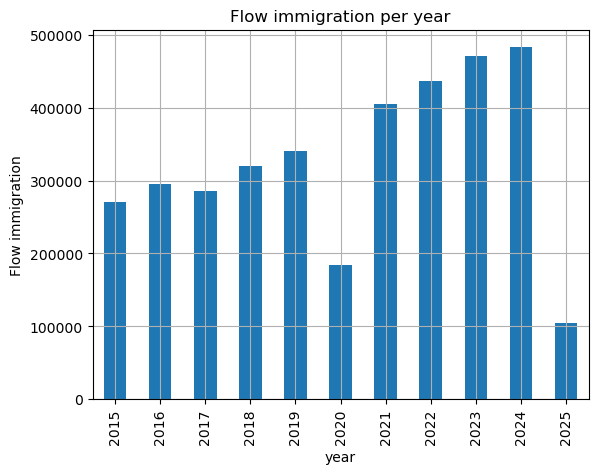

In [9]:
# visualization

ax = immigration_year.plot(kind='bar')
ax.set_title('Flow immigration per year')
ax.set_ylabel('Flow immigration')
ax.grid()
ax

# Immigration by country for period 2015 and 2024

In [10]:
immigration_country = imm_df.groupby(['country'])['immigration_flow'].sum()
immigration_country

country
Afghanistan           84360
Albania                5740
Algeria               41860
American Samoa            0
Andorra                   0
                      ...  
Viet Nam              43215
West Bank and Gaza     6090
Yemen, Rep.            6145
Zambia                  630
Zimbabwe               4860
Name: immigration_flow, Length: 204, dtype: int64

# Immigration by country and by year

In [11]:
immigration_country_year = imm_df.groupby(['country', 'year'])['immigration_flow'].sum()
immigration_country_year = immigration_country_year.reset_index()
immigration_country_year

,country,year,immigration_flow
0,Afghanistan,2015,2625
1,Afghanistan,2016,2655
2,Afghanistan,2017,3460
3,Afghanistan,2018,3560
4,Afghanistan,2019,3890
...,...,...,...
2034,Zimbabwe,2021,505
2035,Zimbabwe,2022,615
2036,Zimbabwe,2023,555
2037,Zimbabwe,2024,600


# Top 20 of immigration flow

In [12]:
# select 20 top countries for a vizualisation

immigration_country_20 = immigration_country.reset_index()
immigration_country_20 = immigration_country_20.sort_values('immigration_flow', ascending=False).head(20)
immigration_country_20['Immigration_flow (000`)'] = immigration_country_20['immigration_flow'] / 1000

immigration_country_20 = immigration_country_20.drop(columns = {'immigration_flow'})
immigration_country_20 = immigration_country_20.set_index('country').sort_values('Immigration_flow (000`)')
immigration_country_20

,Immigration_flow (000`)
country,
Jamaica,37.875
Morocco,40.480
Algeria,41.860
Mexico,42.935
Viet Nam,43.215
"Korea, Rep.",50.475
United Kingdom,52.275
Brazil,52.520
Cameroon,59.590


<Axes: title={'center': 'Immigration by country from 2015-2024'}, ylabel='country'>

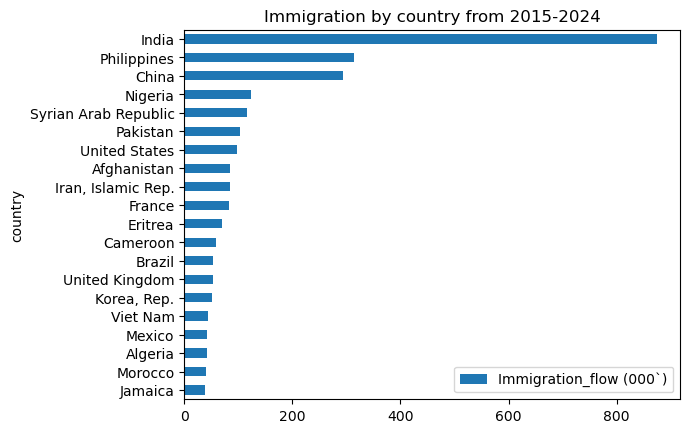

In [13]:
# visualization

ax = immigration_country_20.plot(kind = "barh")
ax.set_title("Immigration by country from 2015-2024")
ax

# full indicators data 
with indicators aggregated by mean

### macro_data average
calculate average value of indicators for the period

In [14]:
# check shape of DF before and after replace NAN

print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(59123, 6)
size after(59123, 6)


In [15]:
macro_data_df_clean

,Unnamed: 0,indicator,country,iso3Code,year,value
0,0,Access to clean fuels and technologies for coo...,Africa Eastern and Southern,AFE,2016,1.855823e+01
1,1,Access to electricity (% of population),Africa Eastern and Southern,AFE,2016,3.885960e+01
2,2,Agricultural land (% of land area),Africa Eastern and Southern,AFE,2016,4.616167e+01
3,3,Arable land (% of land area),Africa Eastern and Southern,AFE,2016,8.102250e+00
4,4,Arable land (hectares per person),Africa Eastern and Southern,AFE,2016,1.928667e-01
...,...,...,...,...,...,...
59118,59118,Population in the largest city (% of urban pop...,Zimbabwe,ZWE,2023,2.970010e+01
59119,59119,Population in urban agglomerations of more tha...,Zimbabwe,ZWE,2023,9.657580e+00
59120,59120,"Population, total",Zimbabwe,ZWE,2023,1.634082e+07
59121,59121,Rural population (% of total population),Zimbabwe,ZWE,2023,6.748300e+01


In [16]:
macro_data_avg_df = macro_data_df_clean.groupby(['country', 'iso3Code', 'indicator'])['value'].mean() 
macro_data_avg_df

country      iso3Code  indicator                                                                                           
Afghanistan  AFG       Access to clean fuels and technologies for cooking (% of population)                                    3.255714e+01
                       Access to electricity (% of population)                                                                 9.531429e+01
                       Agricultural irrigated land (% of total agricultural land)                                              6.102359e+00
                       Agricultural land (% of land area)                                                                      5.843228e+01
                       Arable land (% of land area)                                                                            1.193641e+01
                                                                                                                                   ...     
Zimbabwe     ZWE       Population, t

In [17]:
macro_data_avg_df= macro_data_avg_df.reset_index()
macro_data_avg_df

,country,iso3Code,indicator,value
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,3.255714e+01
1,Afghanistan,AFG,Access to electricity (% of population),9.531429e+01
2,Afghanistan,AFG,Agricultural irrigated land (% of total agricu...,6.102359e+00
3,Afghanistan,AFG,Agricultural land (% of land area),5.843228e+01
4,Afghanistan,AFG,Arable land (% of land area),1.193641e+01
...,...,...,...,...
9306,Zimbabwe,ZWE,"Population, total",1.543157e+07
9307,Zimbabwe,ZWE,Rural population (% of total population),6.769888e+01
9308,Zimbabwe,ZWE,Time required to start a business (days),5.275000e+01
9309,Zimbabwe,ZWE,Total alcohol consumption per capita (liters o...,3.402000e+00


### pivot the table to have the indicators as columns

In [18]:
macro_data_avg_pivot = macro_data_avg_df.pivot(index=['country', 'iso3Code'], columns='indicator', values='value')
macro_data_avg_pivot

,indicator,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),"Armed forces personnel, total",Average precipitation in depth (mm per year),...,Military expenditure (% of GDP),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
country,iso3Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,272380.0,327.0,...,1.211084,57.963107,2.540033,42.187393,10.931372,3.826146e+07,74.074000,8.500000,0.014600,11.936625
Africa Eastern and Southern,AFE,20.240313,44.237272,NaN,NaN,46.386460,8.254367,0.183656,0.505834,1307692.0,NaN,...,1.114273,45.580566,2.685612,27.975430,14.335484,6.858802e+08,63.349365,28.879808,4.536519,7.755785
Africa Western and Central,AFW,16.787494,52.055259,NaN,NaN,40.922329,12.244370,0.231653,0.281037,514910.0,NaN,...,0.945029,51.227963,2.498826,23.231268,16.940286,4.691469e+08,52.386957,18.777273,4.246794,4.209452
Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,8500.0,1485.0,...,1.268485,103.739984,-0.598741,28.053076,NaN,2.830413e+06,38.395625,4.750000,4.990000,12.026625
Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,318840.0,89.0,...,6.111141,18.151199,1.785468,8.613079,6.321116,4.359805e+07,26.579625,18.000000,0.594000,12.291500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,0.0,402.0,...,NaN,769.607385,2.380247,19.360985,NaN,4.751461e+06,23.409875,43.500000,NaN,25.416714
World,WLD,69.591936,89.992633,NaN,NaN,36.798800,10.695194,0.180251,0.798151,27535733.0,NaN,...,2.220676,59.812060,1.006067,15.973929,24.029706,7.805651e+09,44.267204,21.149870,5.436541,5.762994
"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,32000.0,167.0,...,NaN,66.533675,2.930212,21.860224,8.210964,3.566066e+07,62.400250,40.500000,0.031600,17.812375


In [19]:
macro_data_avg_pivot  = macro_data_avg_pivot.reset_index()
macro_data_avg_pivot

indicator,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Military expenditure (% of GDP),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,1.211084,57.963107,2.540033,42.187393,10.931372,3.826146e+07,74.074000,8.500000,0.014600,11.936625
1,Africa Eastern and Southern,AFE,20.240313,44.237272,NaN,NaN,46.386460,8.254367,0.183656,0.505834,...,1.114273,45.580566,2.685612,27.975430,14.335484,6.858802e+08,63.349365,28.879808,4.536519,7.755785
2,Africa Western and Central,AFW,16.787494,52.055259,NaN,NaN,40.922329,12.244370,0.231653,0.281037,...,0.945029,51.227963,2.498826,23.231268,16.940286,4.691469e+08,52.386957,18.777273,4.246794,4.209452
3,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,1.268485,103.739984,-0.598741,28.053076,NaN,2.830413e+06,38.395625,4.750000,4.990000,12.026625
4,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,6.111141,18.151199,1.785468,8.613079,6.321116,4.359805e+07,26.579625,18.000000,0.594000,12.291500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,NaN,769.607385,2.380247,19.360985,NaN,4.751461e+06,23.409875,43.500000,NaN,25.416714
261,World,WLD,69.591936,89.992633,NaN,NaN,36.798800,10.695194,0.180251,0.798151,...,2.220676,59.812060,1.006067,15.973929,24.029706,7.805651e+09,44.267204,21.149870,5.436541,5.762994
262,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,NaN,66.533675,2.930212,21.860224,8.210964,3.566066e+07,62.400250,40.500000,0.031600,17.812375
263,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,1.252639,24.916568,2.925812,32.536375,14.439933,1.879788e+07,55.634500,8.500000,3.780000,5.434375


### Add Immigration flow

In [20]:
imm_vs_macrodata_df = pd.merge(macro_data_avg_pivot,immigration_country, on='country')

imm_vs_macrodata_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,57.963107,2.540033,42.187393,10.931372,3.826146e+07,74.074000,8.50,0.0146,11.936625,84360
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,103.739984,-0.598741,28.053076,NaN,2.830413e+06,38.395625,4.75,4.9900,12.026625,5740
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,18.151199,1.785468,8.613079,6.321116,4.359805e+07,26.579625,18.00,0.5940,12.291500,41860
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,251.625714,-1.335196,NaN,NaN,4.997462e+04,12.822375,NaN,NaN,NaN,0
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,162.014894,1.419874,NaN,NaN,7.673562e+04,12.024625,NaN,10.8140,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,309.618367,0.974859,23.498900,17.427311,9.745442e+07,63.011500,19.75,9.0400,1.777500,43215
200,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,769.607385,2.380247,19.360985,NaN,4.751461e+06,23.409875,43.50,NaN,25.416714,6090
201,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,66.533675,2.930212,21.860224,8.210964,3.566066e+07,62.400250,40.50,0.0316,17.812375,6145
202,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,24.916568,2.925812,32.536375,14.439933,1.879788e+07,55.634500,8.50,3.7800,5.434375,630


### calculate a ratio of immigrants per 100K of the population
this will allow to compare between the countries

In [21]:
imm_vs_macrodata_df['immigration_100k'] = imm_vs_macrodata_df['immigration_flow'] / imm_vs_macrodata_df['Population, total'] * 100000
imm_vs_macrodata_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,2.540033,42.187393,10.931372,3.826146e+07,74.074000,8.50,0.0146,11.936625,84360,220.482946
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,-0.598741,28.053076,NaN,2.830413e+06,38.395625,4.75,4.9900,12.026625,5740,202.797286
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,1.785468,8.613079,6.321116,4.359805e+07,26.579625,18.00,0.5940,12.291500,41860,96.013469
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,-1.335196,NaN,NaN,4.997462e+04,12.822375,NaN,NaN,NaN,0,0.000000
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,1.419874,NaN,NaN,7.673562e+04,12.024625,NaN,10.8140,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,0.974859,23.498900,17.427311,9.745442e+07,63.011500,19.75,9.0400,1.777500,43215,44.343809
200,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,2.380247,19.360985,NaN,4.751461e+06,23.409875,43.50,NaN,25.416714,6090,128.171093
201,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,2.930212,21.860224,8.210964,3.566066e+07,62.400250,40.50,0.0316,17.812375,6145,17.231873
202,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,2.925812,32.536375,14.439933,1.879788e+07,55.634500,8.50,3.7800,5.434375,630,3.351441


In [22]:
imm_vs_macrodata_df = imm_vs_macrodata_df.reset_index()
imm_vs_macrodata_df

,index,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),...,Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k
0,0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,...,2.540033,42.187393,10.931372,3.826146e+07,74.074000,8.50,0.0146,11.936625,84360,220.482946
1,1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,...,-0.598741,28.053076,NaN,2.830413e+06,38.395625,4.75,4.9900,12.026625,5740,202.797286
2,2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,...,1.785468,8.613079,6.321116,4.359805e+07,26.579625,18.00,0.5940,12.291500,41860,96.013469
3,3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,...,-1.335196,NaN,NaN,4.997462e+04,12.822375,NaN,NaN,NaN,0,0.000000
4,4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,...,1.419874,NaN,NaN,7.673562e+04,12.024625,NaN,10.8140,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,...,0.974859,23.498900,17.427311,9.745442e+07,63.011500,19.75,9.0400,1.777500,43215,44.343809
200,200,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,...,2.380247,19.360985,NaN,4.751461e+06,23.409875,43.50,NaN,25.416714,6090,128.171093
201,201,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,...,2.930212,21.860224,8.210964,3.566066e+07,62.400250,40.50,0.0316,17.812375,6145,17.231873
202,202,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,...,2.925812,32.536375,14.439933,1.879788e+07,55.634500,8.50,3.7800,5.434375,630,3.351441


### Add Corruption indicator

In [23]:
# add CPI index by merging with cpi df

full_indicators_countries_df = pd.merge(imm_vs_macrodata_df,cpi_df, how='left' ,  on='iso3Code')

full_indicators_countries_df = full_indicators_countries_df.drop(columns=['country_y', 'index'])

full_indicators_countries_df = full_indicators_countries_df.rename(columns={'country_x' : 'country'})

full_indicators_countries_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,42.187393,10.931372,3.826146e+07,74.074000,8.50,0.0146,11.936625,84360,220.482946,20.0
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,28.053076,NaN,2.830413e+06,38.395625,4.75,4.9900,12.026625,5740,202.797286,37.0
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,8.613079,6.321116,4.359805e+07,26.579625,18.00,0.5940,12.291500,41860,96.013469,36.0
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,NaN,NaN,4.997462e+04,12.822375,NaN,NaN,NaN,0,0.000000,NaN
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,NaN,NaN,7.673562e+04,12.024625,NaN,10.8140,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,23.498900,17.427311,9.745442e+07,63.011500,19.75,9.0400,1.777500,43215,44.343809,41.0
200,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,19.360985,NaN,4.751461e+06,23.409875,43.50,NaN,25.416714,6090,128.171093,NaN
201,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,21.860224,8.210964,3.566066e+07,62.400250,40.50,0.0316,17.812375,6145,17.231873,16.0
202,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,32.536375,14.439933,1.879788e+07,55.634500,8.50,3.7800,5.434375,630,3.351441,37.0


### Add Global peace indicator

In [24]:
# add GPI index by merging with gpi df

full_indicators_countries_df = pd.merge(full_indicators_countries_df, gpi_df, how='left' ,  on='country')


full_indicators_countries_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023,Global_Peace_Index_2023
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,10.931372,3.826146e+07,74.074000,8.50,0.0146,11.936625,84360,220.482946,20.0,3.294
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,NaN,2.830413e+06,38.395625,4.75,4.9900,12.026625,5740,202.797286,37.0,1.809
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,6.321116,4.359805e+07,26.579625,18.00,0.5940,12.291500,41860,96.013469,36.0,2.110
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,NaN,4.997462e+04,12.822375,NaN,NaN,NaN,0,0.000000,NaN,NaN
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,NaN,7.673562e+04,12.024625,NaN,10.8140,NaN,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,17.427311,9.745442e+07,63.011500,19.75,9.0400,1.777500,43215,44.343809,41.0,1.802
201,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,NaN,4.751461e+06,23.409875,43.50,NaN,25.416714,6090,128.171093,NaN,2.872
202,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,8.210964,3.566066e+07,62.400250,40.50,0.0316,17.812375,6145,17.231873,16.0,3.397
203,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,14.439933,1.879788e+07,55.634500,8.50,3.7800,5.434375,630,3.351441,37.0,1.948


### Add Freedom House Index

In [25]:
# add FDI index by merging with fdh df

full_indicators_countries_df = pd.merge(full_indicators_countries_df, fhi_df, how='left' ,  on='country')


full_indicators_countries_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023,Global_Peace_Index_2023,free,partly free,not free
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,8.50,0.0146,11.936625,84360,220.482946,20.0,3.294,False,False,True
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,4.75,4.9900,12.026625,5740,202.797286,37.0,1.809,False,True,False
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,18.00,0.5940,12.291500,41860,96.013469,36.0,2.110,False,False,True
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,NaN,NaN,NaN,0,0.000000,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,NaN,10.8140,NaN,0,0.000000,NaN,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,19.75,9.0400,1.777500,43215,44.343809,41.0,1.802,False,False,True
201,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,43.50,NaN,25.416714,6090,128.171093,NaN,2.872,False,False,True
202,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,40.50,0.0316,17.812375,6145,17.231873,16.0,3.397,False,False,True
203,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,8.50,3.7800,5.434375,630,3.351441,37.0,1.948,False,True,False


### other cleaning

In [26]:
## Rename the indicators to be more ... friendly

full_indicators_countries_df = full_indicators_countries_df.rename(columns={


                                            'Access to clean fuels and technologies for cooking (% of population)'    :   'clean fuels for cooking (% of population)'  ,
                                            'Access to electricity (% of population)'    :   'Access to electricity (% of population)'  ,
                                            'Agricultural land (% of land area)'    :   'Agricultural land (% )'  ,
                                            'Armed forces personnel (% of total labor force)'    :   'Armed forces (% labor force)'  ,
                                            'Average precipitation in depth (mm per year)'    :   'precipitation (mm per year)'  ,
                                            'Birth rate crude (per 1000 people)'    :   'Birth rate crude'  ,
                                            'Central government debt total (% of GDP)'    :   'government debt (% of GDP)'  ,
                                            'Consumer price index (2010 = 100) Control of Corruption: Estimate'    :   'Consumer price index (2010)'  ,
                                            'Cost of business start-up procedures (% of GNI per capita)'    :   'Cost of business start-up (% of GNI per capita)'  ,
                                            'Current account balance (% of GDP)'    :   'Current account balance (% of GDP)'  ,
                                            'Current health expenditure (% of GDP)'    :   'Current health expenditure (% of GDP)'  ,
                                            'Death rate crude (per 1000 people)'    :   'Death rate crude (per 1000 people)'  ,
                                            'Debt service (PPG and IMF only % of exports of goods services and primary income)'    :   'Debt service'  ,
                                            'Ease of doing business score (0 = lowest performance to 100 = best performance)'    :   'doing business score'  ,
                                            'Fertility rate total (births per woman)'    :   'Fertility rate per woman'  ,
                                            'Firms using banks to finance investment (% of firms)'    :   '% Firms using banks'  ,
                                            'GDP growth (annual %) GDP per capita (constant 2015 US$)'    :   'GDP per capita growth '  ,
                                            'GDP per capita PPP (constant 2021 international $)'    :   'GDP per capita PPP ( 2021)'  ,
                                            'GNI per capita (constant 2015 US$)'    :   'GNI per capita (2015 US$)'  ,
                                            'General government final consumption expenditure (% of GDP)'    :   'government  consumption exp (% of GDP)'  ,
                                            'Government expenditure on education total (% of GDP)'    :   'Government expenditure on education total (% of GDP)'  ,
                                            'Human Capital Index (HCI) (scale 0-1)'    :   'Human Capital Index'  ,
                                            'Industry (including construction) value added (% of GDP)'    :   'Industry (% of GDP)'  ,
                                            'Inflation consumer prices (annual %)'    :   'Inflation consumer prices (%)'  ,
                                            'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources'    :   'Level of water stress'  ,
                                            'Life expectancy at birth total (years)'    :   'Life expectancy at birth total (years)'  ,
                                            'Military expenditure (% of GDP)'    :   'Military expenditure (% of GDP)'  ,
                                            'Population density (people per sq. km of land area)'    :   'Population density'  ,
                                            'Population growth (annual %)'    :   'Population growth (annual %)'  ,
                                            'Population living in areas where elevation is below 5 meters (% of total population)'    :   '% of total population below 5 meters'  ,
                                            'Population living in slums (% of urban population)'    :   'Population living in slums (% of urban population)'  ,
                                            'Population total'    :   'Population total'  ,
                                            'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'    :   'Poverty $2.15 a day (% of population)'  ,
                                            'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'    :   'Poverty $3.65 a day (% of population)'  ,
                                            'Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)'    :   'Poverty $6.85 a day (% of population)'  ,
                                            'Poverty headcount ratio at national poverty lines (% of population)'    :   '%  Poverty headcount ratio '  ,
                                            'Time required to start a business (days)'    :   'Time to start a business (days)'  ,
                                            'Total alcohol consumption per capita (liters of pure alcohol projected estimates 15+ years of age)'    :   'Alcohol consumption per capita'  ,
                                            'Total debt service (% of GNI)'    :   'Total debt service (% of GNI)'  ,
                                            'Total debt service (% of exports of goods services and primary income)'    :   'Total debt service (% of exports)'  ,
                                            'Unemployment with advanced education (% of total labor force with advanced education)'    :   'Unemployment advanced education'  ,
                                            'Unemployment with basic education (% of total labor force with basic education)'    :   'Unemployment basic education '  ,
                                            'Unemployment with intermediate education (% of total labor force with intermediate education)'    :   'Unemployment intermediate education'  ,
                                            'Unemployment total (% of total labor force) (modeled ILO estimate)]'    :   'Unemployment total'  ,
                                            'CPI_score_2023' : 'Corruption index 2023'


                                                    })
full_indicators_countries_df

,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),Arable land (hectares per person),Armed forces (% labor force),...,Time to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,8.50,0.0146,11.936625,84360,220.482946,20.0,3.294,False,False,True
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,4.75,4.9900,12.026625,5740,202.797286,37.0,1.809,False,True,False
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,18.00,0.5940,12.291500,41860,96.013469,36.0,2.110,False,False,True
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,NaN,NaN,NaN,0,0.000000,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,NaN,10.8140,NaN,0,0.000000,NaN,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,19.75,9.0400,1.777500,43215,44.343809,41.0,1.802,False,False,True
201,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,43.50,NaN,25.416714,6090,128.171093,NaN,2.872,False,False,True
202,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,40.50,0.0316,17.812375,6145,17.231873,16.0,3.397,False,False,True
203,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,8.50,3.7800,5.434375,630,3.351441,37.0,1.948,False,True,False


In [27]:
full_indicators_countries_df = pd.merge(full_indicators_countries_df, countries_df, on = 'country')
full_indicators_countries_df

,country,iso3Code_x,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),Arable land (hectares per person),Armed forces (% labor force),...,not free,iso3Code_y,iso2Code,region,continent,sub-region,capitalCity,longitude,latitude,OCDE
0,Afghanistan,AFG,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,2.988703,...,True,AFG,AF,"Middle East, North Africa, Afghanistan & Pakistan",Asia,Southern Asia,Kabul,69.17610,34.5228,0
1,Albania,ALB,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,0.619221,...,False,ALB,AL,Europe & Central Asia,Europe,Southern Europe,Tirane,19.81720,41.3317,0
2,Algeria,DZA,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,2.581830,...,True,DZA,DZ,"Middle East, North Africa, Afghanistan & Pakistan",Africa,North Africa,Algiers,3.05097,36.7397,0
3,American Samoa,ASM,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,NaN,...,NaN,ASM,AS,East Asia & Pacific,Oceania,Oceania,Pago Pago,-170.69100,-14.2846,0
4,Andorra,AND,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,NaN,...,False,AND,AD,Europe & Central Asia,Europe,Southern Europe,Andorra la Vella,1.52180,42.5075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Viet Nam,VNM,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,0.938981,...,True,VNM,VN,East Asia & Pacific,Asia,South-Eastern Asia,Hanoi,105.82500,21.0069,0
200,West Bank and Gaza,PSE,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,0.000000,...,True,PSE,PS,"Middle East, North Africa, Afghanistan & Pakistan",Asia,Western Asia,NaN,NaN,NaN,0
201,"Yemen, Rep.",YEM,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,0.489792,...,True,YEM,YE,"Middle East, North Africa, Afghanistan & Pakistan",Asia,Western Asia,Sana'a,44.20750,15.3520,0
202,Zambia,ZMB,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,0.271793,...,False,ZMB,ZM,Sub-Saharan Africa,Africa,Eastern Africa,Lusaka,28.29370,-15.3982,0


In [28]:
# Select needed columns and organize them
full_indicators_countries_df.columns

Index(['country', 'iso3Code_x', 'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adolescents out of school (% of lower secondary school age)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% )', 'Arable land (% of land area)',
       'Arable land (hectares per person)', 'Armed forces (% labor force)',
       'Armed forces personnel, total', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Children in employment, total (% of children ages 7-14)',
       'Children out of school (% of primary school age)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Death rate, crude (per 1,000 people)', 'doing business score',
       'Educational attainment, at least Master's or equivalent, population 25+, total (%)

In [29]:
# Select needed columns and organize them


full_indicators_countries_df = full_indicators_countries_df[[
    
                                        'country', 'continent', 'sub-region',
                                        'clean fuels for cooking (% of population)',
                                        'Access to electricity (% of population)',
                                        'Adolescents out of school (% of lower secondary school age)',
                                        'Agricultural irrigated land (% of total agricultural land)',
                                        'Agricultural land (% )', 'Arable land (% of land area)',
                                        'Arable land (hectares per person)', 'Armed forces (% labor force)',
                                        'Armed forces personnel, total', 'precipitation (mm per year)',
                                        'Birth rate, crude (per 1,000 people)',
                                        'Central government debt, total (% of GDP)',
                                        'Children in employment, total (% of children ages 7-14)',
                                        'Children out of school (% of primary school age)',
                                        'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                        'Cost of business start-up (% of GNI per capita)',
                                        'Death rate, crude (per 1,000 people)', 'doing business score',
                                        "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
                                        'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)',
                                        'Electric power consumption (kWh per capita)',
                                        'Expenditure on primary education (% of government expenditure on education)',
                                        'Expenditure on secondary education (% of government expenditure on education)',
                                        'Expenditure on tertiary education (% of government expenditure on education)',
                                        'Fertility rate, total (births per woman)', 'GDP (constant 2015 US$)',
                                        'GDP growth (annual %)', 'GDP per capita (constant 2015 US$)',
                                        'GDP per capita, PPP (constant 2021 international $)',
                                        'Human capital index (HCI) (scale 0-1)',
                                        'Inflation, consumer prices (annual %)',
                                        'Intentional homicides (per 100,000 people)', 'Level of water stress',
                                        'Life expectancy at birth, total (years)',
                                        'Lifetime risk of maternal death (%)',
                                        'Military expenditure (% of GDP)', 'Population density',
                                        'Population growth (annual %)',
                                        'Population in the largest city (% of urban population)',
                                        'Population in urban agglomerations of more than 1 million (% of total population)',
                                        'Population, total', 'Rural population (% of total population)',
                                        'Time to start a business (days)',
                                        'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                        'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                        'Corruption index 2023',
                                        'Global_Peace_Index_2023', 'free', 'partly free', 'not free',
                                        'OCDE',
                                        'immigration_flow', 'immigration_100k',                                                  
                                          ]]

full_indicators_countries_df

,country,continent,sub-region,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),Arable land (hectares per person),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free,OCDE,immigration_flow,immigration_100k
0,Afghanistan,Asia,Southern Asia,32.557143,95.314286,NaN,6.102359,58.432280,11.936412,0.208737,...,0.0146,11.936625,20.0,3.294,False,False,True,0,84360,220.482946
1,Albania,Europe,Southern Europe,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,...,4.9900,12.026625,37.0,1.809,False,True,False,0,5740,202.797286
2,Algeria,Africa,North Africa,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,...,0.5940,12.291500,36.0,2.110,False,False,True,0,41860,96.013469
3,American Samoa,Oceania,Oceania,NaN,NaN,NaN,NaN,14.178571,4.742857,0.018670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
4,Andorra,Europe,Southern Europe,100.000000,100.000000,7.136009,NaN,39.988997,1.677720,0.010545,...,10.8140,NaN,NaN,NaN,True,False,False,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Viet Nam,Asia,South-Eastern Asia,92.671429,99.771429,3.785817,NaN,39.155435,21.892959,0.071287,...,9.0400,1.777500,41.0,1.802,False,False,True,0,43215,44.343809
200,West Bank and Gaza,Asia,Western Asia,NaN,99.985714,5.636399,NaN,69.685212,8.563669,0.011200,...,NaN,25.416714,NaN,2.872,False,False,True,0,6090,128.171093
201,"Yemen, Rep.",Asia,Western Asia,52.514286,72.528571,34.258968,NaN,44.401278,2.180265,0.033286,...,0.0316,17.812375,16.0,3.397,False,False,True,0,6145,17.231873
202,Zambia,Africa,Eastern Africa,11.142857,42.571429,NaN,NaN,32.048742,5.092501,0.207752,...,3.7800,5.434375,37.0,1.948,False,True,False,0,630,3.351441


In [30]:
full_indicators_countries_df = full_indicators_countries_df.fillna(0)
full_indicators_countries_df

,country,continent,sub-region,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),Arable land (hectares per person),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free,OCDE,immigration_flow,immigration_100k
0,Afghanistan,Asia,Southern Asia,32.557143,95.314286,0.000000,6.102359,58.432280,11.936412,0.208737,...,0.0146,11.936625,20.0,3.294,False,False,True,0,84360,220.482946
1,Albania,Europe,Southern Europe,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,0.213385,...,4.9900,12.026625,37.0,1.809,False,True,False,0,5740,202.797286
2,Algeria,Africa,North Africa,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,0.175014,...,0.5940,12.291500,36.0,2.110,False,False,True,0,41860,96.013469
3,American Samoa,Oceania,Oceania,0.000000,0.000000,0.000000,0.000000,14.178571,4.742857,0.018670,...,0.0000,0.000000,0.0,0.000,0,0,0,0,0,0.000000
4,Andorra,Europe,Southern Europe,100.000000,100.000000,7.136009,0.000000,39.988997,1.677720,0.010545,...,10.8140,0.000000,0.0,0.000,True,False,False,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Viet Nam,Asia,South-Eastern Asia,92.671429,99.771429,3.785817,0.000000,39.155435,21.892959,0.071287,...,9.0400,1.777500,41.0,1.802,False,False,True,0,43215,44.343809
200,West Bank and Gaza,Asia,Western Asia,0.000000,99.985714,5.636399,0.000000,69.685212,8.563669,0.011200,...,0.0000,25.416714,0.0,2.872,False,False,True,0,6090,128.171093
201,"Yemen, Rep.",Asia,Western Asia,52.514286,72.528571,34.258968,0.000000,44.401278,2.180265,0.033286,...,0.0316,17.812375,16.0,3.397,False,False,True,0,6145,17.231873
202,Zambia,Africa,Eastern Africa,11.142857,42.571429,0.000000,0.000000,32.048742,5.092501,0.207752,...,3.7800,5.434375,37.0,1.948,False,True,False,0,630,3.351441


In [31]:
### convert data to Boolean them 0/1

# full_indicators_countries_df['free'] = full_indicators_countries_df['free'].astype(bool)
# full_indicators_countries_df['partly free'] = full_indicators_countries_df['partly free'].astype(bool)
# full_indicators_countries_df['not free'] = full_indicators_countries_df['not free'].astype(bool)
# full_indicators_countries_df['OCDE'] = full_indicators_countries_df['OCDE'].astype(bool)

full_indicators_countries_df[['free', 'partly free', 'not free','OCDE']] = full_indicators_countries_df[['free', 'partly free', 'not free','OCDE']].astype(bool)
full_indicators_countries_df[['free', 'partly free', 'not free','OCDE']] = full_indicators_countries_df[['free', 'partly free', 'not free','OCDE']].astype(int)

In [32]:
full_indicators_countries_df = full_indicators_countries_df.reset_index()
full_indicators_countries_df.head(5)

,index,country,continent,sub-region,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free,OCDE,immigration_flow,immigration_100k
0,0,Afghanistan,Asia,Southern Asia,32.557143,95.314286,0.000000,6.102359,58.432280,11.936412,...,0.0146,11.936625,20.0,3.294,0,0,1,0,84360,220.482946
1,1,Albania,Europe,Southern Europe,81.700000,99.971429,2.824656,15.210061,42.448107,22.164995,...,4.9900,12.026625,37.0,1.809,0,1,0,0,5740,202.797286
2,2,Algeria,Africa,North Africa,99.685714,99.642857,2.757020,3.184234,17.347773,3.148844,...,0.5940,12.291500,36.0,2.110,0,0,1,0,41860,96.013469
3,3,American Samoa,Oceania,Oceania,0.000000,0.000000,0.000000,0.000000,14.178571,4.742857,...,0.0000,0.000000,0.0,0.000,0,0,0,0,0,0.000000
4,4,Andorra,Europe,Southern Europe,100.000000,100.000000,7.136009,0.000000,39.988997,1.677720,...,10.8140,0.000000,0.0,0.000,1,0,0,0,0,0.000000


In [33]:
# export to csv

full_indicators_countries_df.to_csv('../Output/full_indicators_by_country.csv', index=False)

# Create Full_indicators data by year
there will not be any aggregation

In [34]:
# check shape of DF before and after replace NAN

print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(59123, 6)
size after(59123, 6)


In [35]:
macro_data_df_clean

,Unnamed: 0,indicator,country,iso3Code,year,value
0,0,Access to clean fuels and technologies for coo...,Africa Eastern and Southern,AFE,2016,1.855823e+01
1,1,Access to electricity (% of population),Africa Eastern and Southern,AFE,2016,3.885960e+01
2,2,Agricultural land (% of land area),Africa Eastern and Southern,AFE,2016,4.616167e+01
3,3,Arable land (% of land area),Africa Eastern and Southern,AFE,2016,8.102250e+00
4,4,Arable land (hectares per person),Africa Eastern and Southern,AFE,2016,1.928667e-01
...,...,...,...,...,...,...
59118,59118,Population in the largest city (% of urban pop...,Zimbabwe,ZWE,2023,2.970010e+01
59119,59119,Population in urban agglomerations of more tha...,Zimbabwe,ZWE,2023,9.657580e+00
59120,59120,"Population, total",Zimbabwe,ZWE,2023,1.634082e+07
59121,59121,Rural population (% of total population),Zimbabwe,ZWE,2023,6.748300e+01


In [36]:
# macro_data_avg_df = macro_data_df_clean.groupby(['country', 'iso3Code', 'indicator'])['value'].mean() 
# macro_data_avg_df

In [37]:
macrodata_country_year_df= macro_data_df_clean[['country', 'indicator', 'year' , 'value']]
macrodata_country_year_df

,country,indicator,year,value
0,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,2016,1.855823e+01
1,Africa Eastern and Southern,Access to electricity (% of population),2016,3.885960e+01
2,Africa Eastern and Southern,Agricultural land (% of land area),2016,4.616167e+01
3,Africa Eastern and Southern,Arable land (% of land area),2016,8.102250e+00
4,Africa Eastern and Southern,Arable land (hectares per person),2016,1.928667e-01
...,...,...,...,...
59118,Zimbabwe,Population in the largest city (% of urban pop...,2023,2.970010e+01
59119,Zimbabwe,Population in urban agglomerations of more tha...,2023,9.657580e+00
59120,Zimbabwe,"Population, total",2023,1.634082e+07
59121,Zimbabwe,Rural population (% of total population),2023,6.748300e+01


In [38]:
macrodata_country_year_pivot = macrodata_country_year_df.pivot(index=['country', 'year'], columns='indicator', values='value')
macrodata_country_year_pivot

indicator         Access to clean fuels and technologies for cooking (% of population)  \
country     year                                                                         
Afghanistan 2016                                               28.8                      
            2017                                               30.3                      
            2018                                               31.4                      
            2019                                               32.6                      
            2020                                               33.8                      
...                                                             ...                      
Zimbabwe    2019                                               30.3                      
            2020                                               30.5                      
            2021                                               30.5                      
            2022                                               30.8                      
            2023                                                NaN                      

indicator         Access to electricity (% of population)  \
country     year                                            
Afghanistan 2016                                     97.7   
            2017                                     97.7   
            2018                                     93.4   
            2019                                     97.7   
            2020                                     97.7   
...                                                   ...   
Zimbabwe    2019                                     46.7   
            2020                                     52.7   
            2021                                     49.0   
            2022                                     50.1   
            2023                                      NaN   

indicator         Adolescents out of school (% of lower secondary school age)  \
country     year                                                                
Afghanistan 2016                                                NaN             
            2017                                                NaN             
            2018                                                NaN             
            2019                                                NaN             
            2020                                                NaN             
...                                                             ...             
Zimbabwe    2019                                                NaN             
            2020                                                NaN             
            2021                                                NaN             
            2022                                                NaN             
            2023                                                NaN             

indicator         Agricultural irrigated land (% of total agricultural land)  \
country     year                                                               
Afghanistan 2016                                           6.481140            
            2017                                           5.990504            
            2018                                           5.122336            
            2019                                           6.006314            
            2020                                           6.506930            
...                                                             ...            
Zimbabwe    2019                                                NaN            
            2020                                                NaN            
            2021                                                NaN            
            2022                                                NaN            
            2023     

In [39]:
macrodata_country_year_pivot  = macrodata_country_year_pivot.reset_index()
macrodata_country_year_pivot

indicator,country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Military expenditure (% of GDP),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,0.956772,53.203030,2.535720,43.966829,11.000501,34700612.0,74.980,8.5,0.013,10.133
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,0.945227,54.718328,2.808337,43.425802,10.965015,35688935.0,74.750,8.5,0.017,11.184
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,1.006746,56.334482,2.910810,42.825844,10.918449,36743039.0,74.505,8.5,0.016,11.196
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,1.170968,58.041061,2.984389,42.197495,10.867542,37856121.0,74.246,8.5,0.016,11.185
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,1.358857,59.900616,3.153609,41.517445,10.805330,39068979.0,73.974,NaN,0.011,11.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,Zimbabwe,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,0.261928,0.883387,...,0.729567,39.476200,1.563534,30.927820,9.961851,15271368.0,67.790,27.0,3.630,7.373
2116,Zimbabwe,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,0.257618,0.877221,...,0.997931,40.136714,1.659353,30.560633,9.853359,15526888.0,67.758,NaN,2.670,8.621
2117,Zimbabwe,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,0.253209,NaN,...,1.481532,40.835492,1.726011,30.214230,9.760103,15797210.0,67.697,NaN,NaN,9.540
2118,Zimbabwe,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,NaN,NaN,...,0.780494,41.538209,1.706209,29.924479,9.694036,16069056.0,67.605,NaN,NaN,10.087


In [40]:
imm_vs_macrodata_country_year_df = pd.merge(macrodata_country_year_pivot,immigration_country_year, on=['country','year'])

imm_vs_macrodata_country_year_df

,country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,53.203030,2.535720,43.966829,11.000501,34700612.0,74.980,8.5,0.013,10.133,2655
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,54.718328,2.808337,43.425802,10.965015,35688935.0,74.750,8.5,0.017,11.184,3460
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,56.334482,2.910810,42.825844,10.918449,36743039.0,74.505,8.5,0.016,11.196,3560
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,58.041061,2.984389,42.197495,10.867542,37856121.0,74.246,8.5,0.016,11.185,3890
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,59.900616,3.153609,41.517445,10.805330,39068979.0,73.974,NaN,0.011,11.710,1655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,Zimbabwe,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,0.261928,0.883387,...,39.476200,1.563534,30.927820,9.961851,15271368.0,67.790,27.0,3.630,7.373,560
1484,Zimbabwe,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,0.257618,0.877221,...,40.136714,1.659353,30.560633,9.853359,15526888.0,67.758,NaN,2.670,8.621,335
1485,Zimbabwe,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,0.253209,NaN,...,40.835492,1.726011,30.214230,9.760103,15797210.0,67.697,NaN,NaN,9.540,505
1486,Zimbabwe,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,NaN,NaN,...,41.538209,1.706209,29.924479,9.694036,16069056.0,67.605,NaN,NaN,10.087,615


In [41]:
imm_vs_macrodata_country_year_df['immigration_100k'] = imm_vs_macrodata_country_year_df['immigration_flow'] / imm_vs_macrodata_country_year_df['Population, total'] * 100000
imm_vs_macrodata_country_year_df

,country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population growth (annual %),Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,2.535720,43.966829,11.000501,34700612.0,74.980,8.5,0.013,10.133,2655,7.651162
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,2.808337,43.425802,10.965015,35688935.0,74.750,8.5,0.017,11.184,3460,9.694882
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,2.910810,42.825844,10.918449,36743039.0,74.505,8.5,0.016,11.196,3560,9.688910
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,2.984389,42.197495,10.867542,37856121.0,74.246,8.5,0.016,11.185,3890,10.275749
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,3.153609,41.517445,10.805330,39068979.0,73.974,NaN,0.011,11.710,1655,4.236097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,Zimbabwe,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,0.261928,0.883387,...,1.563534,30.927820,9.961851,15271368.0,67.790,27.0,3.630,7.373,560,3.666993
1484,Zimbabwe,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,0.257618,0.877221,...,1.659353,30.560633,9.853359,15526888.0,67.758,NaN,2.670,8.621,335,2.157548
1485,Zimbabwe,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,0.253209,NaN,...,1.726011,30.214230,9.760103,15797210.0,67.697,NaN,NaN,9.540,505,3.196767
1486,Zimbabwe,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,NaN,NaN,...,1.706209,29.924479,9.694036,16069056.0,67.605,NaN,NaN,10.087,615,3.827232


In [42]:
# imm_vs_macrodata_country_year_df = imm_vs_macrodata_country_year_df.reset_index()
# imm_vs_macrodata_country_year_df

### create new df cpi + gpi woth data for years 2015 to 2023
i will just duplicate the 2023 data to all the years

In [43]:
# Generate a list of years
years = list(range(2015, 2025))
years

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [44]:
cpi_y_df = cpi_df.copy()
gpi_y_df = gpi_df.copy()
fhi_y_df = fhi_df.copy()
cpi_y_df['year'] = [years] * len(cpi_y_df)
gpi_y_df['year'] = [years] * len(gpi_y_df)
fhi_y_df['year'] = [years] * len(fhi_y_df)

In [45]:
cpi_y_df = cpi_y_df.explode('year', ignore_index=True)
cpi_y_df.head(5)

,country,iso3Code,CPI_score_2023,year
0,Denmark,DNK,90,2015
1,Denmark,DNK,90,2016
2,Denmark,DNK,90,2017
3,Denmark,DNK,90,2018
4,Denmark,DNK,90,2019


In [46]:
gpi_y_df = gpi_y_df.explode('year', ignore_index=True)

gpi_y_df.head(5)

,country,Global_Peace_Index_2023,year
0,Afghanistan,3.294,2015
1,Afghanistan,3.294,2016
2,Afghanistan,3.294,2017
3,Afghanistan,3.294,2018
4,Afghanistan,3.294,2019


In [47]:
fhi_y_df = fhi_y_df.explode('year', ignore_index=True)

fhi_y_df.head(5)

,country,free,partly free,not free,year
0,Abkhazia,False,True,False,2015
1,Abkhazia,False,True,False,2016
2,Abkhazia,False,True,False,2017
3,Abkhazia,False,True,False,2018
4,Abkhazia,False,True,False,2019


In [48]:
# add CPI index by merging with cpi df

full_indicators_countries_year_df = pd.merge(imm_vs_macrodata_country_year_df,cpi_y_df, how='left' ,  on=['country', 'year'])

# full_indicators_countries_year_df = full_indicators_countries_year_df.drop(columns='country_y')

full_indicators_countries_year_df = full_indicators_countries_year_df.rename(columns={'country_x' : 'country'})

full_indicators_countries_year_df

,country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,iso3Code,CPI_score_2023
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,11.000501,34700612.0,74.980,8.5,0.013,10.133,2655,7.651162,AFG,20.0
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,10.965015,35688935.0,74.750,8.5,0.017,11.184,3460,9.694882,AFG,20.0
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,10.918449,36743039.0,74.505,8.5,0.016,11.196,3560,9.688910,AFG,20.0
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,10.867542,37856121.0,74.246,8.5,0.016,11.185,3890,10.275749,AFG,20.0
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,10.805330,39068979.0,73.974,NaN,0.011,11.710,1655,4.236097,AFG,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,Zimbabwe,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,0.261928,0.883387,...,9.961851,15271368.0,67.790,27.0,3.630,7.373,560,3.666993,ZWE,24.0
1484,Zimbabwe,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,0.257618,0.877221,...,9.853359,15526888.0,67.758,NaN,2.670,8.621,335,2.157548,ZWE,24.0
1485,Zimbabwe,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,0.253209,NaN,...,9.760103,15797210.0,67.697,NaN,NaN,9.540,505,3.196767,ZWE,24.0
1486,Zimbabwe,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,NaN,NaN,...,9.694036,16069056.0,67.605,NaN,NaN,10.087,615,3.827232,ZWE,24.0


In [49]:
# add GPI index by merging with gpi df

full_indicators_countries_year_df = pd.merge(full_indicators_countries_year_df, gpi_y_df, how='left' ,  on=['country', 'year'])


full_indicators_countries_year_df

,country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,"Population, total",Rural population (% of total population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,iso3Code,CPI_score_2023,Global_Peace_Index_2023
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,34700612.0,74.980,8.5,0.013,10.133,2655,7.651162,AFG,20.0,3.294
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,35688935.0,74.750,8.5,0.017,11.184,3460,9.694882,AFG,20.0,3.294
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,36743039.0,74.505,8.5,0.016,11.196,3560,9.688910,AFG,20.0,3.294
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,37856121.0,74.246,8.5,0.016,11.185,3890,10.275749,AFG,20.0,3.294
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,39068979.0,73.974,NaN,0.011,11.710,1655,4.236097,AFG,20.0,3.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,Zimbabwe,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,0.261928,0.883387,...,15271368.0,67.790,27.0,3.630,7.373,560,3.666993,ZWE,24.0,2.396
1492,Zimbabwe,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,0.257618,0.877221,...,15526888.0,67.758,NaN,2.670,8.621,335,2.157548,ZWE,24.0,2.396
1493,Zimbabwe,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,0.253209,NaN,...,15797210.0,67.697,NaN,NaN,9.540,505,3.196767,ZWE,24.0,2.396
1494,Zimbabwe,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,NaN,NaN,...,16069056.0,67.605,NaN,NaN,10.087,615,3.827232,ZWE,24.0,2.396


In [50]:
# add fhi index by merging with fdh df

full_indicators_countries_year_df = pd.merge(full_indicators_countries_year_df, fhi_y_df, how='left' ,  on=['country', 'year'])


full_indicators_countries_year_df

,country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Arable land (% of land area),Arable land (hectares per person),Armed forces personnel (% of total labor force),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,iso3Code,CPI_score_2023,Global_Peace_Index_2023,free,partly free,not free
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,0.013,10.133,2655,7.651162,AFG,20.0,3.294,False,False,True
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,0.017,11.184,3460,9.694882,AFG,20.0,3.294,False,False,True
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,0.016,11.196,3560,9.688910,AFG,20.0,3.294,False,False,True
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,0.016,11.185,3890,10.275749,AFG,20.0,3.294,False,False,True
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,0.011,11.710,1655,4.236097,AFG,20.0,3.294,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,Zimbabwe,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,0.261928,0.883387,...,3.630,7.373,560,3.666993,ZWE,24.0,2.396,False,False,True
1492,Zimbabwe,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,0.257618,0.877221,...,2.670,8.621,335,2.157548,ZWE,24.0,2.396,False,False,True
1493,Zimbabwe,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,0.253209,NaN,...,NaN,9.540,505,3.196767,ZWE,24.0,2.396,False,False,True
1494,Zimbabwe,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,NaN,NaN,...,NaN,10.087,615,3.827232,ZWE,24.0,2.396,False,False,True


In [51]:
## Rename the indicators to be more ... friendly

full_indicators_countries_year_df = full_indicators_countries_year_df.rename(columns={


                                            'Access to clean fuels and technologies for cooking (% of population)'    :   'clean fuels for cooking (% of population)'  ,
                                            'Access to electricity (% of population)'    :   'Access to electricity (% of population)'  ,
                                            'Agricultural land (% of land area)'    :   'Agricultural land (% )'  ,
                                            'Armed forces personnel (% of total labor force)'    :   'Armed forces (% labor force)'  ,
                                            'Average precipitation in depth (mm per year)'    :   'precipitation (mm per year)'  ,
                                            'Birth rate crude (per 1000 people)'    :   'Birth rate crude'  ,
                                            'Central government debt total (% of GDP)'    :   'government debt (% of GDP)'  ,
                                            'Consumer price index (2010 = 100) Control of Corruption: Estimate'    :   'Consumer price index (2010)'  ,
                                            'Cost of business start-up procedures (% of GNI per capita)'    :   'Cost of business start-up (% of GNI per capita)'  ,
                                            'Current account balance (% of GDP)'    :   'Current account balance (% of GDP)'  ,
                                            'Current health expenditure (% of GDP)'    :   'Current health expenditure (% of GDP)'  ,
                                            'Death rate crude (per 1000 people)'    :   'Death rate crude (per 1000 people)'  ,
                                            'Debt service (PPG and IMF only % of exports of goods services and primary income)'    :   'Debt service'  ,
                                            'Ease of doing business score (0 = lowest performance to 100 = best performance)'    :   'doing business score'  ,
                                            'Fertility rate total (births per woman)'    :   'Fertility rate per woman'  ,
                                            'Firms using banks to finance investment (% of firms)'    :   '% Firms using banks'  ,
                                            'GDP growth (annual %) GDP per capita (constant 2015 US$)'    :   'GDP per capita growth '  ,
                                            'GDP per capita PPP (constant 2021 international $)'    :   'GDP per capita PPP ( 2021)'  ,
                                            'GNI per capita (constant 2015 US$)'    :   'GNI per capita (2015 US$)'  ,
                                            'General government final consumption expenditure (% of GDP)'    :   'government  consumption exp (% of GDP)'  ,
                                            'Government expenditure on education total (% of GDP)'    :   'Government expenditure on education total (% of GDP)'  ,
                                            'Human Capital Index (HCI) (scale 0-1)'    :   'Human Capital Index'  ,
                                            'Industry (including construction) value added (% of GDP)'    :   'Industry (% of GDP)'  ,
                                            'Inflation consumer prices (annual %)'    :   'Inflation consumer prices (%)'  ,
                                            'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources'    :   'Level of water stress'  ,
                                            'Life expectancy at birth total (years)'    :   'Life expectancy at birth total (years)'  ,
                                            'Military expenditure (% of GDP)'    :   'Military expenditure (% of GDP)'  ,
                                            'Population density (people per sq. km of land area)'    :   'Population density'  ,
                                            'Population growth (annual %)'    :   'Population growth (annual %)'  ,
                                            'Population living in areas where elevation is below 5 meters (% of total population)'    :   '% of total population below 5 meters'  ,
                                            'Population living in slums (% of urban population)'    :   'Population living in slums (% of urban population)'  ,
                                            'Population total'    :   'Population total'  ,
                                            'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'    :   'Poverty $2.15 a day (% of population)'  ,
                                            'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'    :   'Poverty $3.65 a day (% of population)'  ,
                                            'Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)'    :   'Poverty $6.85 a day (% of population)'  ,
                                            'Poverty headcount ratio at national poverty lines (% of population)'    :   '%  Poverty headcount ratio '  ,
                                            'Time required to start a business (days)'    :   'Time to start a business (days)'  ,
                                            'Total alcohol consumption per capita (liters of pure alcohol projected estimates 15+ years of age)'    :   'Alcohol consumption per capita'  ,
                                            'Total debt service (% of GNI)'    :   'Total debt service (% of GNI)'  ,
                                            'Total debt service (% of exports of goods services and primary income)'    :   'Total debt service (% of exports)'  ,
                                            'Unemployment with advanced education (% of total labor force with advanced education)'    :   'Unemployment advanced education'  ,
                                            'Unemployment with basic education (% of total labor force with basic education)'    :   'Unemployment basic education '  ,
                                            'Unemployment with intermediate education (% of total labor force with intermediate education)'    :   'Unemployment intermediate education'  ,
                                            'Unemployment total (% of total labor force) (modeled ILO estimate)]'    :   'Unemployment total'  ,
                                            'CPI_score_2023' : 'Corruption index 2023'


                                                    })
full_indicators_countries_year_df.head(5)

,country,year,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),Arable land (hectares per person),Armed forces (% labor force),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,iso3Code,Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free
0,Afghanistan,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,0.222734,3.635915,...,0.013,10.133,2655,7.651162,AFG,20.0,3.294,False,False,True
1,Afghanistan,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,0.215725,3.501771,...,0.017,11.184,3460,9.694882,AFG,20.0,3.294,False,False,True
2,Afghanistan,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,0.212122,2.961201,...,0.016,11.196,3560,9.688910,AFG,20.0,3.294,False,False,True
3,Afghanistan,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,0.205726,3.023536,...,0.016,11.185,3890,10.275749,AFG,20.0,3.294,False,False,True
4,Afghanistan,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,0.200389,1.821090,...,0.011,11.710,1655,4.236097,AFG,20.0,3.294,False,False,True


In [52]:
full_indicators_countries_year_df = pd.merge(full_indicators_countries_year_df, countries_df, on='country')

In [53]:
# Select needed columns and organize them
full_indicators_countries_year_df.columns

Index(['country', 'year', 'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adolescents out of school (% of lower secondary school age)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% )', 'Arable land (% of land area)',
       'Arable land (hectares per person)', 'Armed forces (% labor force)',
       'Armed forces personnel, total', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Children in employment, total (% of children ages 7-14)',
       'Children out of school (% of primary school age)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Death rate, crude (per 1,000 people)', 'doing business score',
       'Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumu

In [54]:
# Select needed columns and organize them


full_indicators_countries_year_df = full_indicators_countries_year_df[[
    
                                        'country', 'continent', 'sub-region', 
                                         'year', 'clean fuels for cooking (% of population)',
                                        'Access to electricity (% of population)',
                                        'Adolescents out of school (% of lower secondary school age)',
                                        'Agricultural irrigated land (% of total agricultural land)',
                                        'Agricultural land (% )', 'Arable land (% of land area)',
                                        'Arable land (hectares per person)', 'Armed forces (% labor force)',
                                        'Armed forces personnel, total', 'precipitation (mm per year)',
                                        'Birth rate, crude (per 1,000 people)',
                                        'Central government debt, total (% of GDP)',
                                        'Children in employment, total (% of children ages 7-14)',
                                        'Children out of school (% of primary school age)',
                                        'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                        'Cost of business start-up (% of GNI per capita)',
                                        'Death rate, crude (per 1,000 people)', 'doing business score',
                                        "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
                                        'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)',
                                        'Electric power consumption (kWh per capita)',
                                        'Expenditure on primary education (% of government expenditure on education)',
                                        'Expenditure on secondary education (% of government expenditure on education)',
                                        'Expenditure on tertiary education (% of government expenditure on education)',
                                        'Fertility rate, total (births per woman)', 'GDP (constant 2015 US$)',
                                        'GDP growth (annual %)', 'GDP per capita (constant 2015 US$)',
                                        'GDP per capita, PPP (constant 2021 international $)',
                                        'Human capital index (HCI) (scale 0-1)',
                                        'Inflation, consumer prices (annual %)',
                                        'Intentional homicides (per 100,000 people)', 'Level of water stress',
                                        'Life expectancy at birth, total (years)',
                                        'Lifetime risk of maternal death (%)',
                                        'Military expenditure (% of GDP)', 'Population density',
                                        'Population growth (annual %)',
                                        'Population in the largest city (% of urban population)',
                                        'Population in urban agglomerations of more than 1 million (% of total population)',
                                        'Population, total', 'Rural population (% of total population)',
                                        'Time to start a business (days)',
                                        'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                        'Unemployment, total (% of total labor force) (modeled ILO estimate)', 
                                        'Corruption index 2023', 'Global_Peace_Index_2023', 'free',
                                        'partly free', 'not free','OCDE',
                                        'immigration_flow', 'immigration_100k'
                                          
                                          ]]

full_indicators_countries_year_df

,country,continent,sub-region,year,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free,OCDE,immigration_flow,immigration_100k
0,Afghanistan,Asia,Southern Asia,2016,28.8,97.7,NaN,6.481140,58.123668,11.850114,...,0.013,10.133,20.0,3.294,False,False,True,0,2655,7.651162
1,Afghanistan,Asia,Southern Asia,2017,30.3,97.7,NaN,5.990504,58.123668,11.804118,...,0.017,11.184,20.0,3.294,False,False,True,0,3460,9.694882
2,Afghanistan,Asia,Southern Asia,2018,31.4,93.4,NaN,5.122336,58.276988,11.949772,...,0.016,11.196,20.0,3.294,False,False,True,0,3560,9.688910
3,Afghanistan,Asia,Southern Asia,2019,32.6,97.7,NaN,6.006314,58.276988,11.940573,...,0.016,11.185,20.0,3.294,False,False,True,0,3890,10.275749
4,Afghanistan,Asia,Southern Asia,2020,33.8,97.7,NaN,6.506930,58.741548,12.003434,...,0.011,11.710,20.0,3.294,False,False,True,0,1655,4.236097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,Zimbabwe,Africa,Eastern Africa,2019,30.3,46.7,NaN,NaN,39.518358,8.099009,...,3.630,7.373,24.0,2.396,False,False,True,0,560,3.666993
1491,Zimbabwe,Africa,Eastern Africa,2020,30.5,52.7,NaN,NaN,39.754073,8.320764,...,2.670,8.621,24.0,2.396,False,False,True,0,335,2.157548
1492,Zimbabwe,Africa,Eastern Africa,2021,30.5,49.0,NaN,NaN,39.385906,7.952922,...,NaN,9.540,24.0,2.396,False,False,True,0,505,3.196767
1493,Zimbabwe,Africa,Eastern Africa,2022,30.8,50.1,NaN,NaN,39.489284,8.058050,...,NaN,10.087,24.0,2.396,False,False,True,0,615,3.827232


In [55]:
full_indicators_countries_year_df = full_indicators_countries_year_df.fillna(0)
full_indicators_countries_year_df

C:\Users\nazim\AppData\Local\Temp\ipykernel_26556\888689611.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_indicators_countries_year_df = full_indicators_countries_year_df.fillna(0)


,country,continent,sub-region,year,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),Arable land (% of land area),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free,OCDE,immigration_flow,immigration_100k
0,Afghanistan,Asia,Southern Asia,2016,28.8,97.7,0.0,6.481140,58.123668,11.850114,...,0.013,10.133,20.0,3.294,False,False,True,0,2655,7.651162
1,Afghanistan,Asia,Southern Asia,2017,30.3,97.7,0.0,5.990504,58.123668,11.804118,...,0.017,11.184,20.0,3.294,False,False,True,0,3460,9.694882
2,Afghanistan,Asia,Southern Asia,2018,31.4,93.4,0.0,5.122336,58.276988,11.949772,...,0.016,11.196,20.0,3.294,False,False,True,0,3560,9.688910
3,Afghanistan,Asia,Southern Asia,2019,32.6,97.7,0.0,6.006314,58.276988,11.940573,...,0.016,11.185,20.0,3.294,False,False,True,0,3890,10.275749
4,Afghanistan,Asia,Southern Asia,2020,33.8,97.7,0.0,6.506930,58.741548,12.003434,...,0.011,11.710,20.0,3.294,False,False,True,0,1655,4.236097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,Zimbabwe,Africa,Eastern Africa,2019,30.3,46.7,0.0,0.000000,39.518358,8.099009,...,3.630,7.373,24.0,2.396,False,False,True,0,560,3.666993
1491,Zimbabwe,Africa,Eastern Africa,2020,30.5,52.7,0.0,0.000000,39.754073,8.320764,...,2.670,8.621,24.0,2.396,False,False,True,0,335,2.157548
1492,Zimbabwe,Africa,Eastern Africa,2021,30.5,49.0,0.0,0.000000,39.385906,7.952922,...,0.000,9.540,24.0,2.396,False,False,True,0,505,3.196767
1493,Zimbabwe,Africa,Eastern Africa,2022,30.8,50.1,0.0,0.000000,39.489284,8.058050,...,0.000,10.087,24.0,2.396,False,False,True,0,615,3.827232


In [56]:
full_indicators_countries_year_df.dtypes

country                                                                                                  object
continent                                                                                                object
sub-region                                                                                               object
year                                                                                                      int64
clean fuels for cooking (% of population)                                                               float64
Access to electricity (% of population)                                                                 float64
Adolescents out of school (% of lower secondary school age)                                             float64
Agricultural irrigated land (% of total agricultural land)                                              float64
Agricultural land (% )                                                                                  

In [57]:
### convert data to Boolean

full_indicators_countries_year_df['free'] = full_indicators_countries_year_df['free'].astype(bool)
full_indicators_countries_year_df['partly free'] = full_indicators_countries_year_df['partly free'].astype(bool)
full_indicators_countries_year_df['not free'] = full_indicators_countries_year_df['not free'].astype(bool)
full_indicators_countries_year_df['OCDE'] = full_indicators_countries_year_df['OCDE'].astype(bool)


In [58]:
full_indicators_countries_year_df = full_indicators_countries_year_df.reset_index()
full_indicators_countries_year_df

,index,country,continent,sub-region,year,clean fuels for cooking (% of population),Access to electricity (% of population),Adolescents out of school (% of lower secondary school age),Agricultural irrigated land (% of total agricultural land),Agricultural land (% ),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,free,partly free,not free,OCDE,immigration_flow,immigration_100k
0,0,Afghanistan,Asia,Southern Asia,2016,28.8,97.7,0.0,6.481140,58.123668,...,0.013,10.133,20.0,3.294,False,False,True,False,2655,7.651162
1,1,Afghanistan,Asia,Southern Asia,2017,30.3,97.7,0.0,5.990504,58.123668,...,0.017,11.184,20.0,3.294,False,False,True,False,3460,9.694882
2,2,Afghanistan,Asia,Southern Asia,2018,31.4,93.4,0.0,5.122336,58.276988,...,0.016,11.196,20.0,3.294,False,False,True,False,3560,9.688910
3,3,Afghanistan,Asia,Southern Asia,2019,32.6,97.7,0.0,6.006314,58.276988,...,0.016,11.185,20.0,3.294,False,False,True,False,3890,10.275749
4,4,Afghanistan,Asia,Southern Asia,2020,33.8,97.7,0.0,6.506930,58.741548,...,0.011,11.710,20.0,3.294,False,False,True,False,1655,4.236097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1490,Zimbabwe,Africa,Eastern Africa,2019,30.3,46.7,0.0,0.000000,39.518358,...,3.630,7.373,24.0,2.396,False,False,True,False,560,3.666993
1491,1491,Zimbabwe,Africa,Eastern Africa,2020,30.5,52.7,0.0,0.000000,39.754073,...,2.670,8.621,24.0,2.396,False,False,True,False,335,2.157548
1492,1492,Zimbabwe,Africa,Eastern Africa,2021,30.5,49.0,0.0,0.000000,39.385906,...,0.000,9.540,24.0,2.396,False,False,True,False,505,3.196767
1493,1493,Zimbabwe,Africa,Eastern Africa,2022,30.8,50.1,0.0,0.000000,39.489284,...,0.000,10.087,24.0,2.396,False,False,True,False,615,3.827232


In [59]:
# export to csv

full_indicators_countries_year_df.to_csv('../Output/full_indicators_by_country_by_year.csv', index=False)

In [60]:
full_indicators_countries_year__long_df = full_indicators_countries_year_df.copy()
full_indicators_countries_year__long_df = full_indicators_countries_year__long_df.drop(columns='index')
full_indicators_countries_year__long_df = pd.melt(full_indicators_countries_year__long_df,id_vars=['country','year'], var_name='indicator', value_name='value')
full_indicators_countries_year__long_df = full_indicators_countries_year__long_df.reset_index()

full_indicators_countries_year__long_df


,index,country,year,indicator,value
0,0,Afghanistan,2016,continent,Asia
1,1,Afghanistan,2017,continent,Asia
2,2,Afghanistan,2018,continent,Asia
3,3,Afghanistan,2019,continent,Asia
4,4,Afghanistan,2020,continent,Asia
...,...,...,...,...,...
83715,83715,Zimbabwe,2019,immigration_100k,3.666993
83716,83716,Zimbabwe,2020,immigration_100k,2.157548
83717,83717,Zimbabwe,2021,immigration_100k,3.196767
83718,83718,Zimbabwe,2022,immigration_100k,3.827232


In [61]:
full_indicators_countries_year__long_df.to_csv('../Output/full_indicators_by_country_by_year_long.csv',index=False)